<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Integration%2C_Cointegration%2C_and_Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Useful Functions
def check_for_stationarity(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print 'p-value = ' + str(pvalue) + ' The series is likely stationary.'
        return True
    else:
        print 'p-value = ' + str(pvalue) + ' The series is likely non-stationary.'
        return False
    
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

In [0]:
# Useful Libraries
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt

#Stationarity Testing
##a. Checking For Stationarity

Check whether the following series is stationary using the tests from the lecture.

In [0]:
QQQ = get_pricing("QQQ", start_date='2014-1-1', end_date='2015-1-1', fields='price')
QQQ.name = QQQ.name.symbol

check_for_stationarity(QQQ)



```


p-value = 0.83074729803 The series is likely non-stationary.

False


```




##b. Checking for Normality

As an extra all-purpose check, and one that is often done on series, check whether the above series is normally distributed using the Jarque-Bera test.


In [0]:
from statsmodels.stats.stattools import jarque_bera

jarque_bera(QQQ)



```
(16.77608340090589,
 0.00022757249739878912,
 0.2415274043817217,
 1.8319331010647477)
```




##c. Constructing Examples I

Create/provide a series that is stationary and different from any covered so far in the exercise or the lecture.


In [0]:
X = np.random.normal(0, 1, 100)

check_for_stationarity(X)



```


p-value = 8.15924515037e-16 The series is likely stationary.

True


```




##d. Constructing Examples II

Create/provide a series that is non-stationary and different from any covered so far in the exercise or the lecture.


In [0]:
# Set the number of datapoints
T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (np.power(t, 2), 1)
    B[t] = generate_datapoint(params)

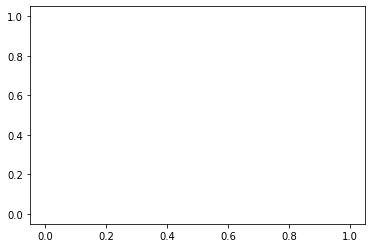

In [7]:
plt.plot(B);

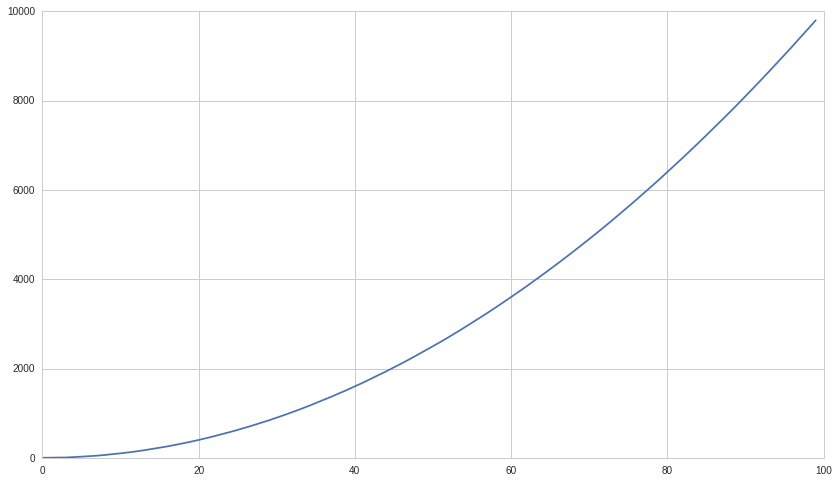

In [0]:
check_for_stationarity(B)



```


p-value = 0.964313099004 The series is likely non-stationary.

False


```



##Estimate Order of Integration

Use the techniques laid out in the lecture notebook to estimate the order of integration for the following timeseries.

In [0]:


QQQ = get_pricing("QQQ", start_date='2014-1-1', end_date='2015-1-1', fields='price')
QQQ.name = QQQ.name.symbol

# Write code to estimate the order of integration of QQQ.
# Feel free to sample from the code provided in the lecture.



In [0]:
QQQ = QQQ.diff()[1:]
QQQ.name = QQQ.name + ' Additive Returns'
check_for_stationarity(QQQ)
plt.plot(QQQ.index, QQQ.values)
plt.ylabel('Additive Returns')
plt.legend([QQQ.name]);



```
p-value = 2.93736515664e-28 The series is likely stationary.
```



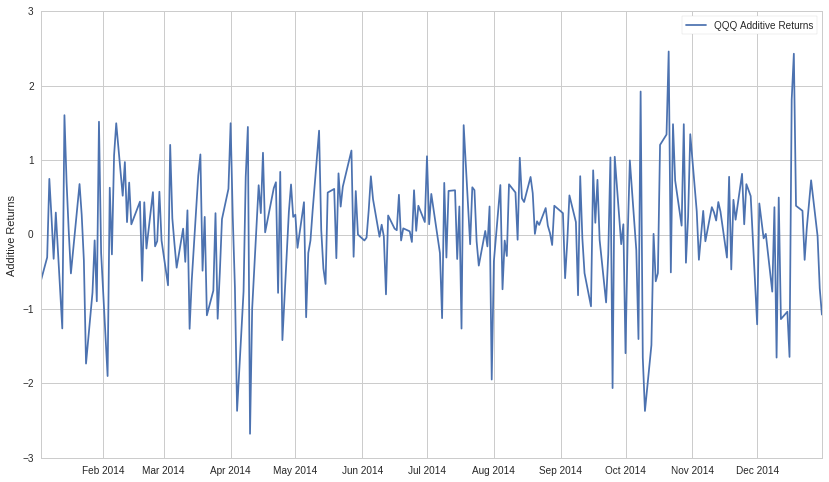

##Find a Stationary Linear (Cointegrated) Combination

Use the techniques laid out in the lecture notebook to find a linear combination of the following timeseries that is stationary.

In [0]:
T = 500

X1 = pd.Series(index=range(T))
X1.name = 'X1'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (t * 0.1, 1)
    X1[t] = generate_datapoint(params)

X2 = np.power(X1, 2) + X1
X3 = np.power(X1, 3) + X1
X4 = np.sin(X1) + X1

# We now have 4 time series, X1, X2, X3, X4
# Determine a linear combination of the 4 that is stationary over the 
# time period shown using the techniques in the lecture.

In [0]:
X1 = sm.add_constant(X1)
results = sm.OLS(X4, X1).fit()

# Get rid of the constant column
X1 = X1['X1']

results.params



```
const    0.017736
X1       0.997973
dtype: float64
```



In [0]:
plt.plot(X4-0.99 * X1);

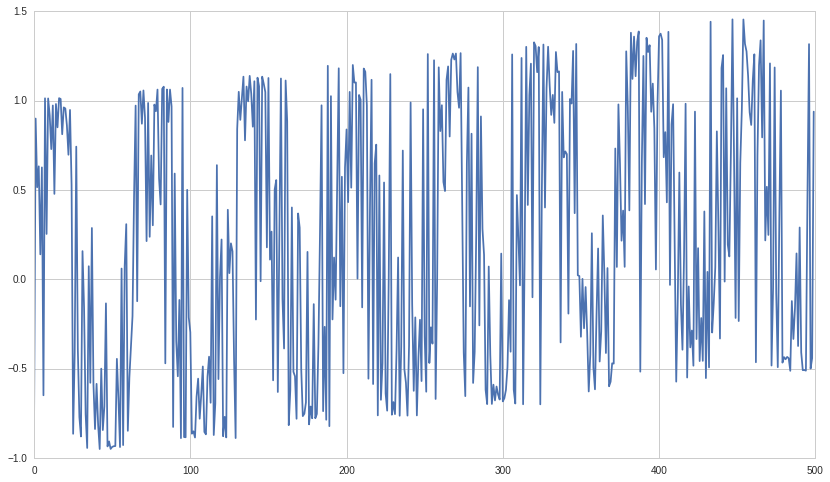

In [0]:
check_for_stationarity(X4 - 0.99*X1)



```


p-value = 7.40184822771e-07 The series is likely stationary.

True


```

